# Import The Libraries

In [10]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading The Data

In [12]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Preparing The Data

In [14]:
df = df.drop('id', axis= 1)
df = df.drop('dataset' , axis = 1)
df = df.rename(columns={'num': 'degree'})
df['target'] = df['degree']
df['target'] = df['target'].mask(df['target'] != 0, 1).mask(df['target'] == 0, 0)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,degree,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  degree    920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [17]:
df = df.drop_duplicates()

In [18]:
col_has_nulls = []

In [19]:
for col in df.columns:
  col_data = (df[col].isna().sum()/ len(df)) * 100
  if col_data > 80:
    print(f"The {col} Has Nulls Greater Than {80}% = {col_data}")
    col_has_nulls.append(col)
  else:
    print(f"The {col} Has Nulls = {col_data}%")
    if col_data != 0:
      col_has_nulls.append(col)

The age Has Nulls = 0.0%
The sex Has Nulls = 0.0%
The cp Has Nulls = 0.0%
The trestbps Has Nulls = 6.427015250544662%
The chol Has Nulls = 3.159041394335512%
The fbs Has Nulls = 9.803921568627452%
The restecg Has Nulls = 0.2178649237472767%
The thalch Has Nulls = 5.991285403050109%
The exang Has Nulls = 5.991285403050109%
The oldpeak Has Nulls = 6.753812636165578%
The slope Has Nulls = 33.44226579520697%
The ca Has Nulls = 66.33986928104575%
The thal Has Nulls = 52.723311546840954%
The degree Has Nulls = 0.0%
The target Has Nulls = 0.0%


In [20]:
df.shape

(918, 15)

# Collecting the Columns according to data type

In [21]:
categorical_columns = [col for col in df.columns if df[col].dtype in ['object', 'category']]
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [22]:
print(numeric_columns)
print(categorical_columns)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'degree', 'target']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [23]:
for col in df.columns:
  print(f"The Unique Values In {col} = {df[col].unique()}")
  print('================================================')

The Unique Values In age = [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]
The Unique Values In sex = ['Male' 'Female']
The Unique Values In cp = ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
The Unique Values In trestbps = [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]
The Unique Values In chol = [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 2

# Prepare The Columns

In [24]:
df['trestbps'] = df['trestbps'].mask(df['trestbps'] <= 0, np.nan)
df['chol'] = df['chol'].mask(df['chol'] <= 0, np.nan)
df['oldpeak'] = df['oldpeak'].mask(df['oldpeak'] < 0, np.nan)

# Check on The NUlls Percentage

In [25]:
for col in df.columns:
  col_data = (df[col].isna().sum()/ len(df)) * 100
  if col_data > 80:
    print(f"The {col} Has Nulls Greater Than {80}% = {col_data}")
    if col in numeric_columns:
      numeric_columns.remove(col)
    elif col in categorical_columns:
      categorical_columns.remove(col)
  else:
    print(f"The {col} Has Nulls = {col_data}%")

The age Has Nulls = 0.0%
The sex Has Nulls = 0.0%
The cp Has Nulls = 0.0%
The trestbps Has Nulls = 6.535947712418301%
The chol Has Nulls = 21.895424836601308%
The fbs Has Nulls = 9.803921568627452%
The restecg Has Nulls = 0.2178649237472767%
The thalch Has Nulls = 5.991285403050109%
The exang Has Nulls = 5.991285403050109%
The oldpeak Has Nulls = 8.061002178649238%
The slope Has Nulls = 33.44226579520697%
The ca Has Nulls = 66.33986928104575%
The thal Has Nulls = 52.723311546840954%
The degree Has Nulls = 0.0%
The target Has Nulls = 0.0%


In [26]:
pd.set_option('future.no_silent_downcasting', True)

# Handle Missing Values

# Handle Missing Values In Numerical Columns

In [27]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).any()

for col in numeric_columns:
    if col in col_has_nulls:
      skewness = df[col].skew()
      outliers_present = has_outliers(df[col].dropna())
      print(f"{col}: Skewness = {skewness:.3f}, Outliers = {outliers_present}")
      if abs(skewness) < 0.5 and not outliers_present:
          df[col] = df[col].fillna(df[col].mean())
          print(f"{col} will be filled with mean")
      else:
          df[col] = df[col].fillna(df[col].median())
          print(f"{col} will be filled with median")

trestbps: Skewness = 0.632, Outliers = True
trestbps will be filled with median
chol: Skewness = 1.313, Outliers = True
chol will be filled with median
thalch: Skewness = -0.211, Outliers = True
thalch will be filled with median
oldpeak: Skewness = 1.153, Outliers = True
oldpeak will be filled with median
ca: Skewness = 1.166, Outliers = True
ca will be filled with median


# Missing Handle Values In Categorical Values

In [28]:
missing_cols = [col for col in categorical_columns if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are not in df: {missing_cols}")
else:
    for col in categorical_columns:
      if col in col_has_nulls:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"{col}: Imputed missing values with mode = {mode_value}")

fbs: Imputed missing values with mode = False
restecg: Imputed missing values with mode = normal
exang: Imputed missing values with mode = False
slope: Imputed missing values with mode = flat
thal: Imputed missing values with mode = normal


# Visualize the Target Column

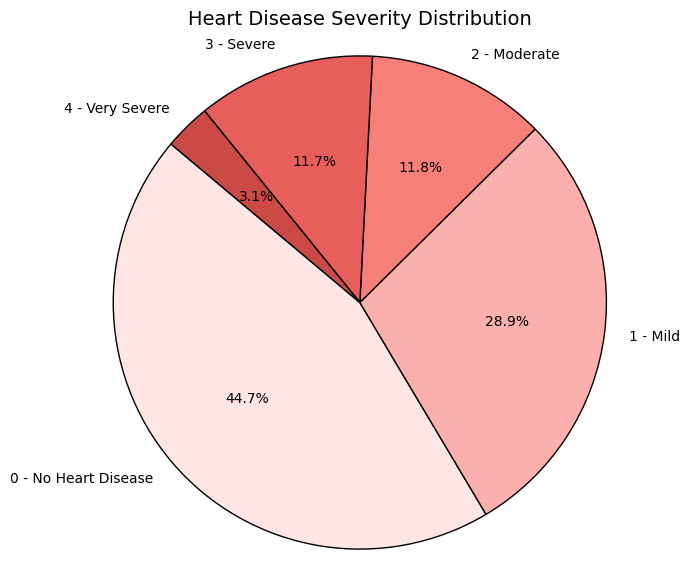

In [30]:
disease_counts = df['degree'].value_counts().sort_index()
display_labels = [
    '0 - No Heart Disease',
    '1 - Mild',
    '2 - Moderate',
    '3 - Severe',
    '4 - Very Severe'
]
colors = [
    '#ffe6e5',
    '#fbb0ad',
    '#f67f79',
    '#e85e5a',
    '#cc4a45'
]
plt.figure(figsize=(7, 7))
plt.pie(disease_counts, labels=display_labels, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Heart Disease Severity Distribution', fontsize=14)
plt.axis('equal')
plt.show()

# Visualize The Categorical Data

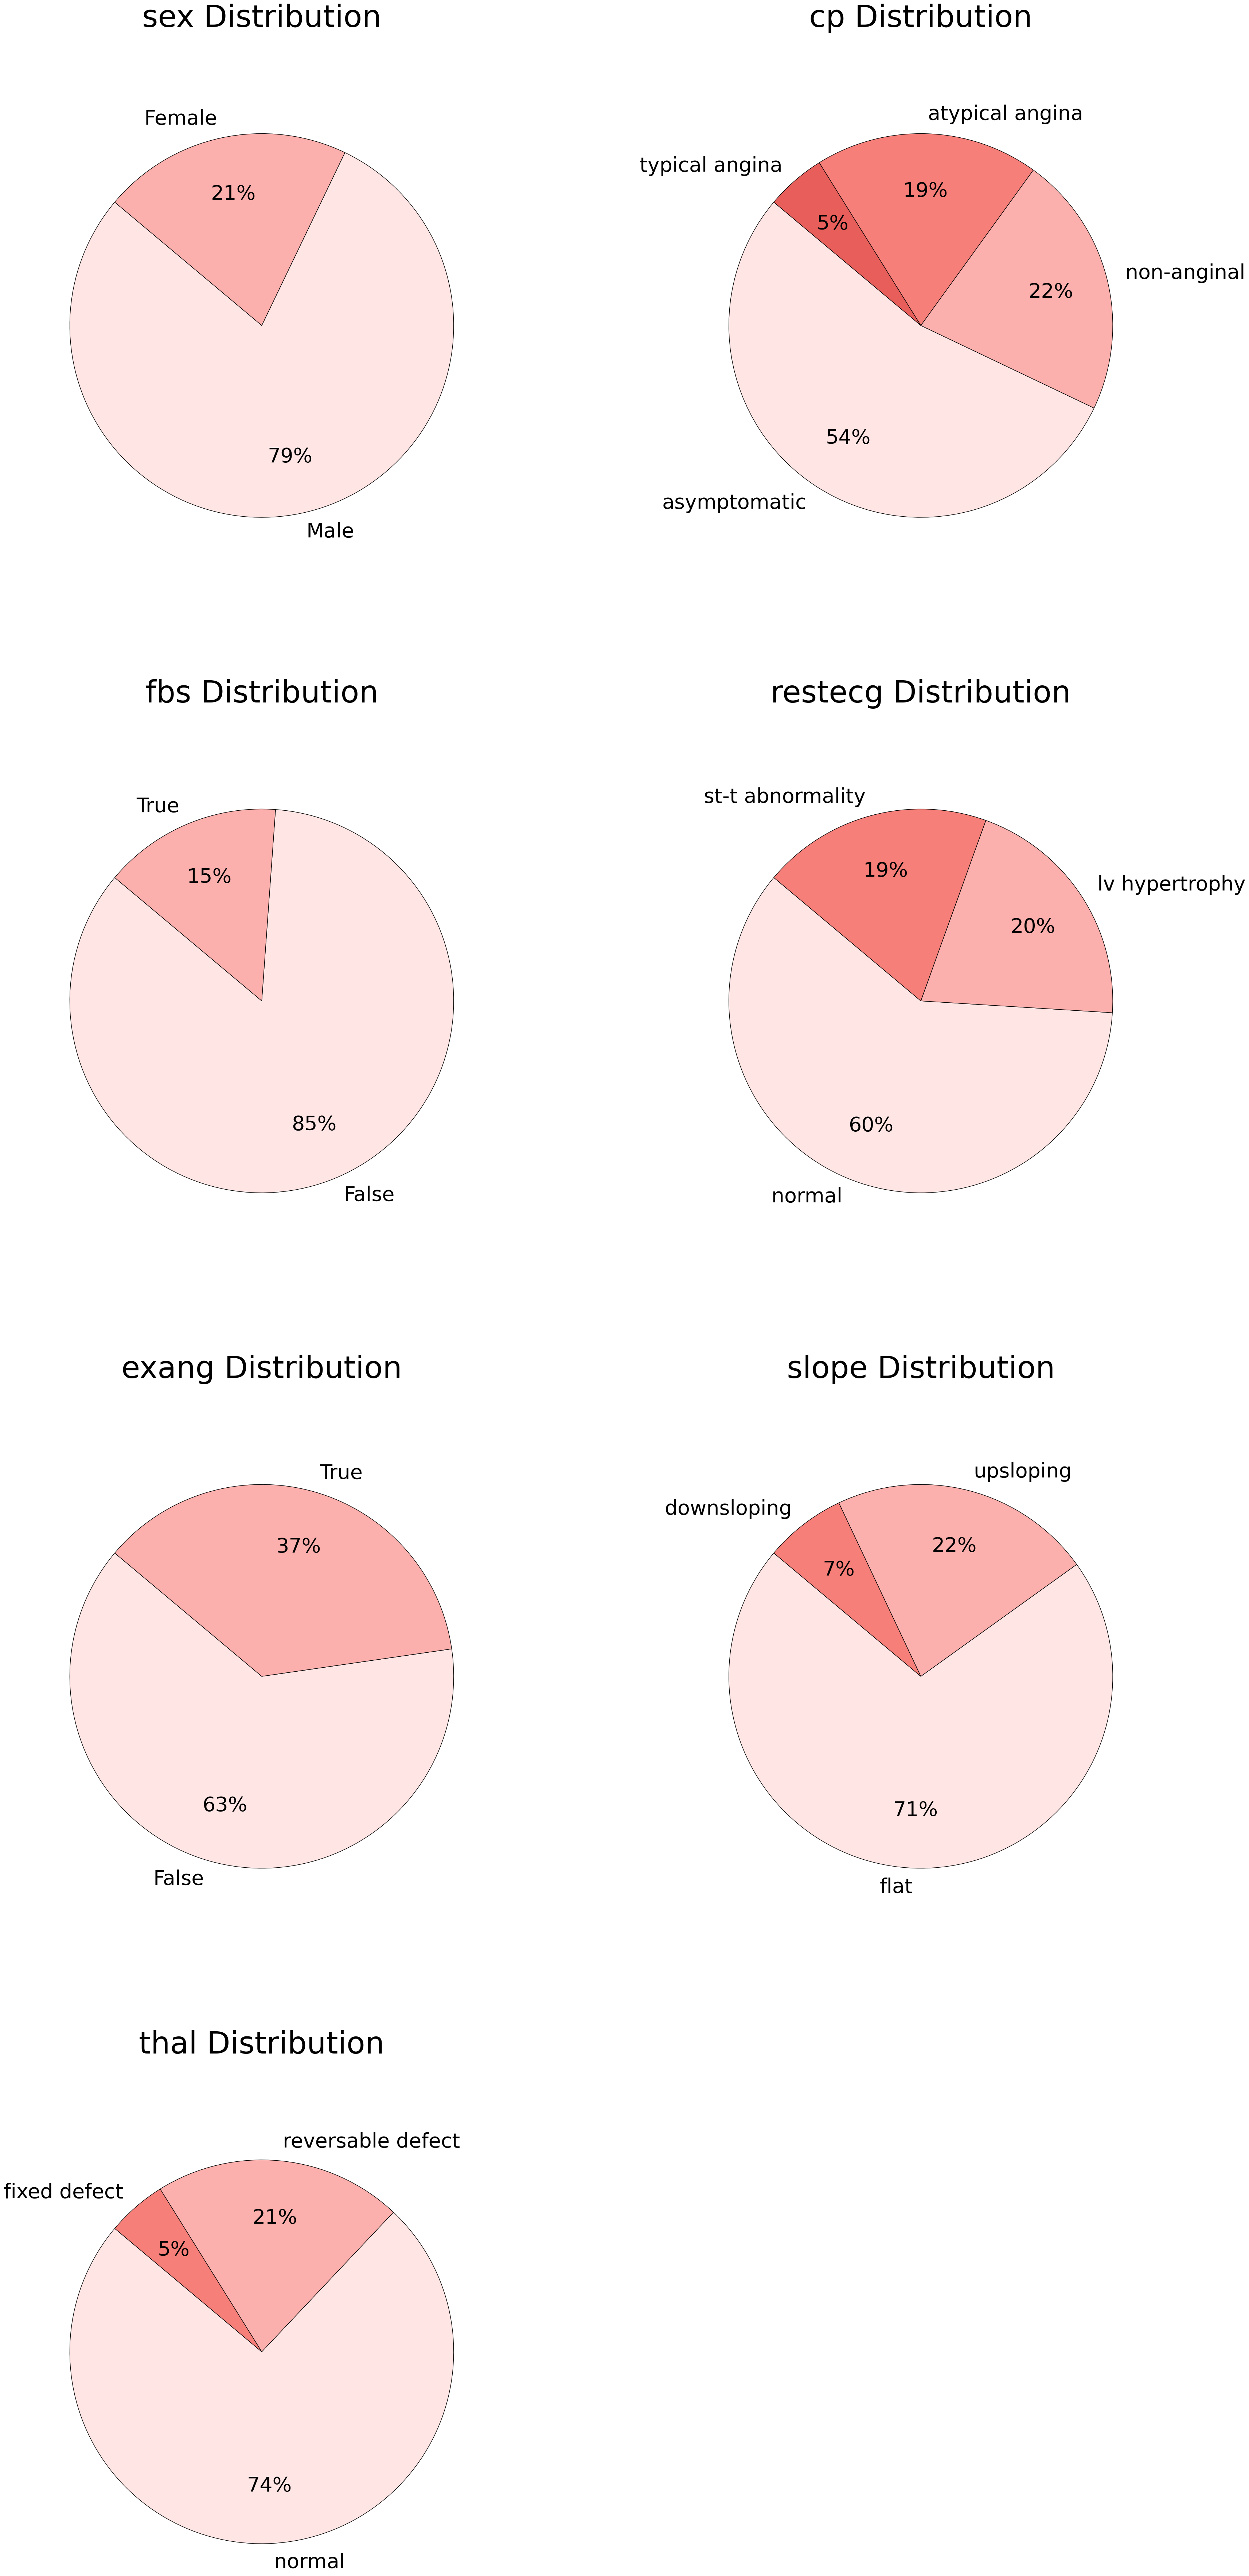

In [31]:
column_to_visualize = categorical_columns.copy()
num_charts = len(column_to_visualize)
cols = 2
rows = math.ceil(num_charts / cols)
fig, axes = plt.subplots(
    rows, cols,
    figsize=(20 * cols, 20 * rows),
    gridspec_kw={'wspace': 0.4, 'hspace': 0.6}
)
axes = axes.flatten() if num_charts > 1 else [axes]

for i, col in enumerate(column_to_visualize):
    target_counts = df[col].value_counts()
    labels = target_counts.index.astype(str)
    colors = ['#ffe6e5', '#fbb0ad', '#f67f79', '#e85e5a', '#cc4a45'][:len(labels)]

    wedges, texts, autotexts = axes[i].pie(
        target_counts,
        labels=labels,
        autopct='%1.0f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 40},
        labeldistance=1.1,
        pctdistance=0.7
    )

    for text in texts:
        text.set_fontsize(40)
    for autotext in autotexts:
        autotext.set_fontsize(40)

    axes[i].axis('equal')
    axes[i].set_title(f'{col} Distribution', fontsize=60, y=1.2)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.95)
plt.show()

# Apply One Hot Encoding For Categorical Data

## Encode Sex Column

In [32]:
df['sex'] = df['sex'].replace({"Male": 0, "Female": 1}).infer_objects(copy=False)

## Encode CP Column

In [33]:
df['cp'] = df['cp'].replace({
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
}).astype('int64')

## Encode Restecg Column

In [34]:
df['restecg'] = df['restecg'].replace({
    'normal': 0,
    'st-t abnormality': 1,
    'lv hypertrophy': 2
}).astype('int64')

## Encode Slope Column

In [35]:
df['slope'] = df['slope'].replace({
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
}).astype('int64')

## Encode Thal Column

In [36]:
df['thal'] = df['thal'].replace({
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
}).astype('int64')

# Encodind FBS Column

In [37]:
df['fbs'] = df['fbs'].replace({
    'True': 1,
    'False': 0,
}).astype('int64')

# Encoding Exang Column

In [38]:
df['exang'] = df['exang'].replace({
    'True': 1,
    'False': 0,
}).astype('int64')

In [39]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,degree,target
0,63,0,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,1,0,0
1,67,0,3,160.0,286.0,0,2,108.0,1,1.5,1,3.0,0,2,1
2,67,0,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,2,1,1
3,37,0,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,0,0,0
4,41,1,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,0,0,0
5,56,0,1,120.0,236.0,0,0,178.0,0,0.8,0,0.0,0,0,0
6,62,1,3,140.0,268.0,0,2,160.0,0,3.6,2,2.0,0,3,1
7,57,1,3,120.0,354.0,0,0,163.0,1,0.6,0,0.0,0,0,0
8,63,0,3,130.0,254.0,0,2,147.0,0,1.4,1,1.0,2,2,1
9,53,0,3,140.0,203.0,1,2,155.0,1,3.1,2,0.0,2,1,1


# Apply MinMaxScaler on Numerical data

In [42]:
numeric_columns.remove('degree')
numeric_columns.remove('target')

In [43]:
scaler = MinMaxScaler()
for col in numeric_columns:
    df[col] = scaler.fit_transform(df[[col]])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    float64
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    int64  
 7   thalch    918 non-null    float64
 8   exang     918 non-null    int64  
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    int64  
 11  ca        918 non-null    float64
 12  thal      918 non-null    int64  
 13  degree    918 non-null    int64  
 14  target    918 non-null    int64  
dtypes: float64(6), int64(9)
memory usage: 114.8 KB


In [45]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,degree,target
0,0.714286,0,0,0.541667,0.285714,1,2,0.633803,0,0.370968,2,0.000000,1,0,0
1,0.795918,0,3,0.666667,0.388031,0,2,0.338028,1,0.241935,1,1.000000,0,2,1
2,0.795918,0,3,0.333333,0.277992,0,2,0.485915,1,0.419355,1,0.666667,2,1,1
3,0.183673,0,2,0.416667,0.318533,0,0,0.894366,0,0.564516,2,0.000000,0,0,0
4,0.265306,1,1,0.416667,0.229730,0,2,0.788732,0,0.225806,0,0.000000,0,0,0
5,0.571429,0,1,0.333333,0.291506,0,0,0.830986,0,0.129032,0,0.000000,0,0,0
6,0.693878,1,3,0.500000,0.353282,0,2,0.704225,0,0.580645,2,0.666667,0,3,1
7,0.591837,1,3,0.333333,0.519305,0,0,0.725352,1,0.096774,0,0.000000,0,0,0
8,0.714286,0,3,0.416667,0.326255,0,2,0.612676,0,0.225806,1,0.333333,2,2,1
9,0.510204,0,3,0.500000,0.227799,1,2,0.669014,1,0.500000,2,0.000000,2,1,1


# Conduct Exploratory Data Analysis (EDA)

In [46]:
sns.set(style='whitegrid', palette='pastel')

# 📊 1. Histograms – Visualize Distributions

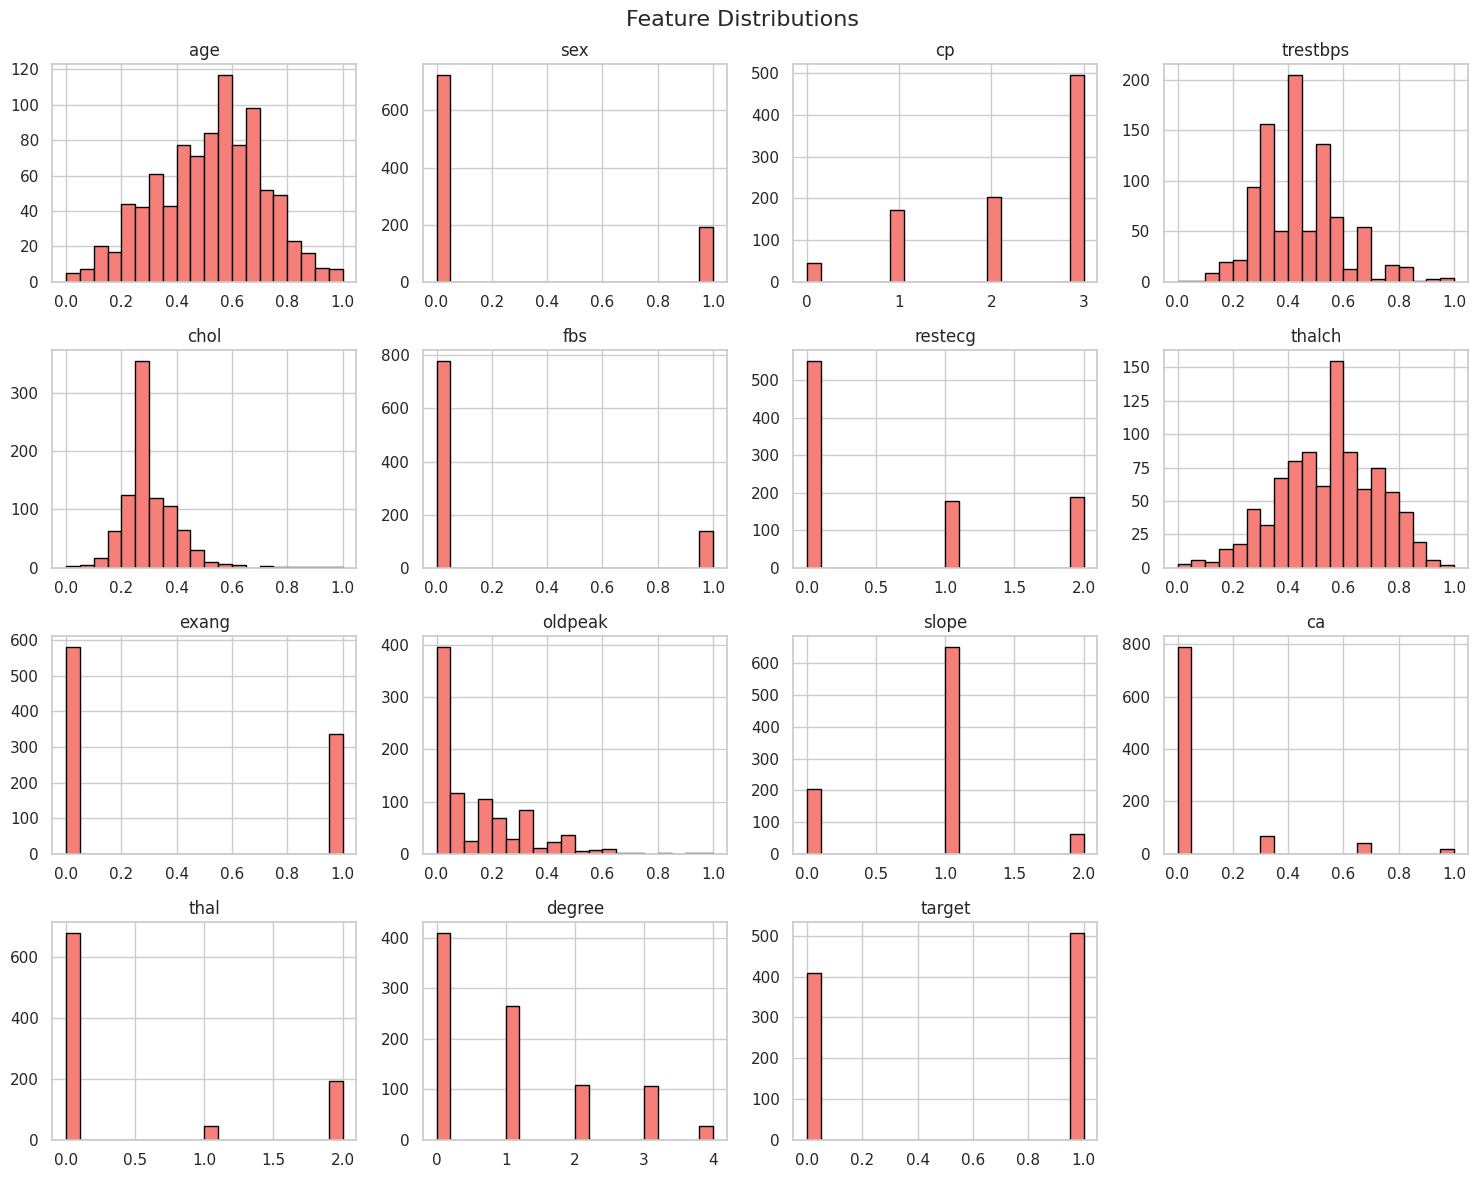

In [47]:
df.hist(figsize=(15, 12), bins=20, color='#f67f79', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap – Feature Relationships

In [51]:
df_disease_state = df[['target' , 'degree']]
df = df.drop('target' , axis = 1)
df = df.drop('degree' , axis = 1)

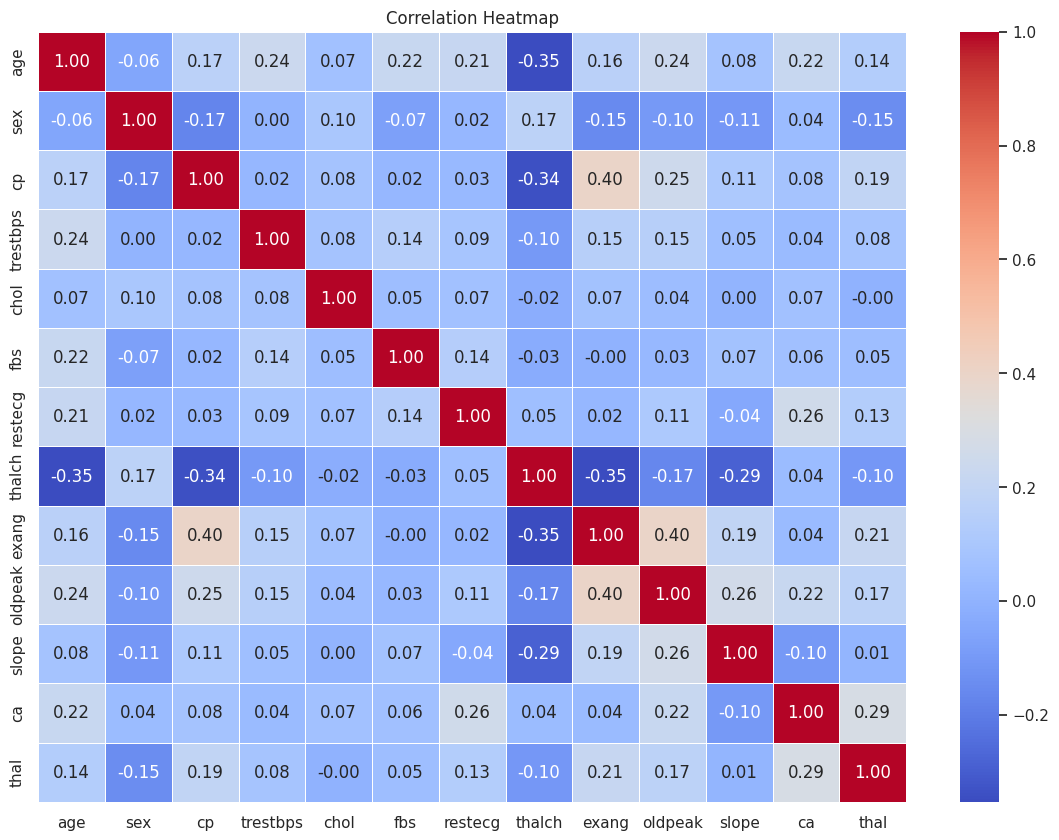

In [52]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 📦 3. Boxplots – Detect Outliers & Compare Groups

In [55]:
df[['target' , 'degree']] = df_disease_state

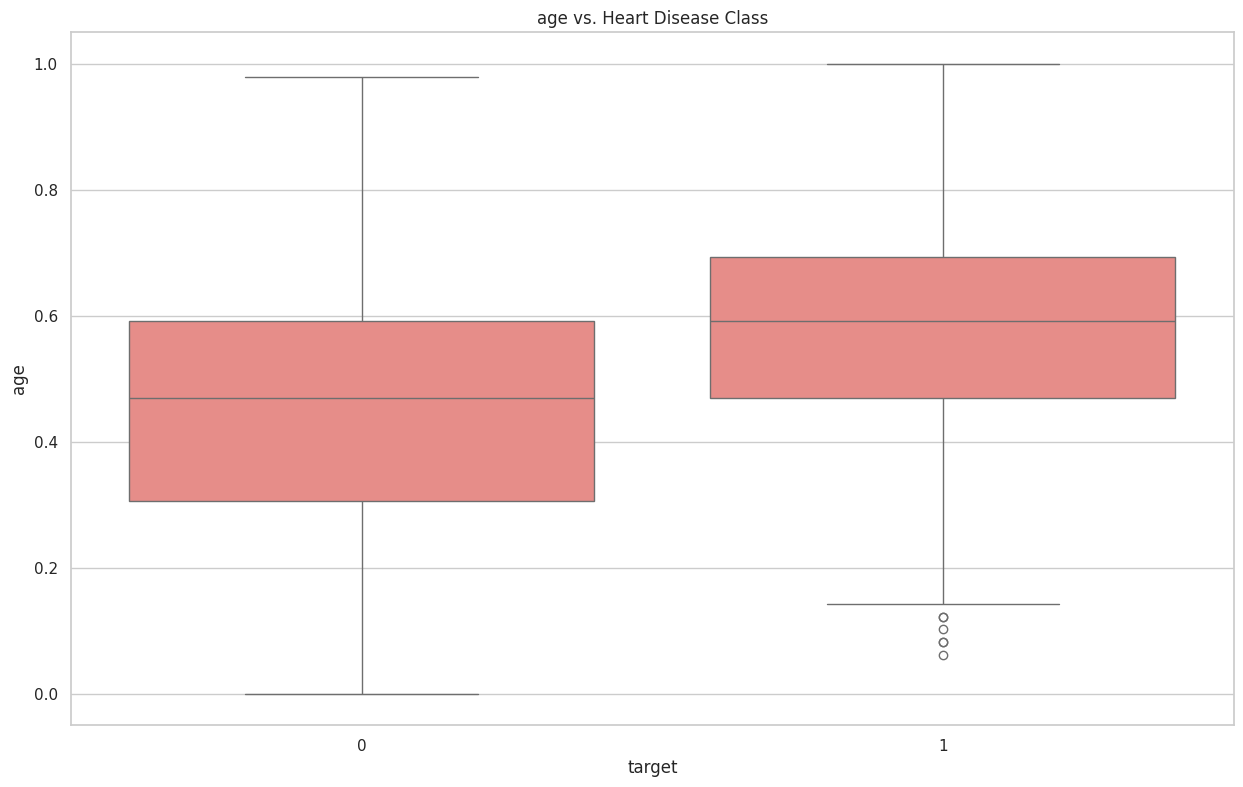

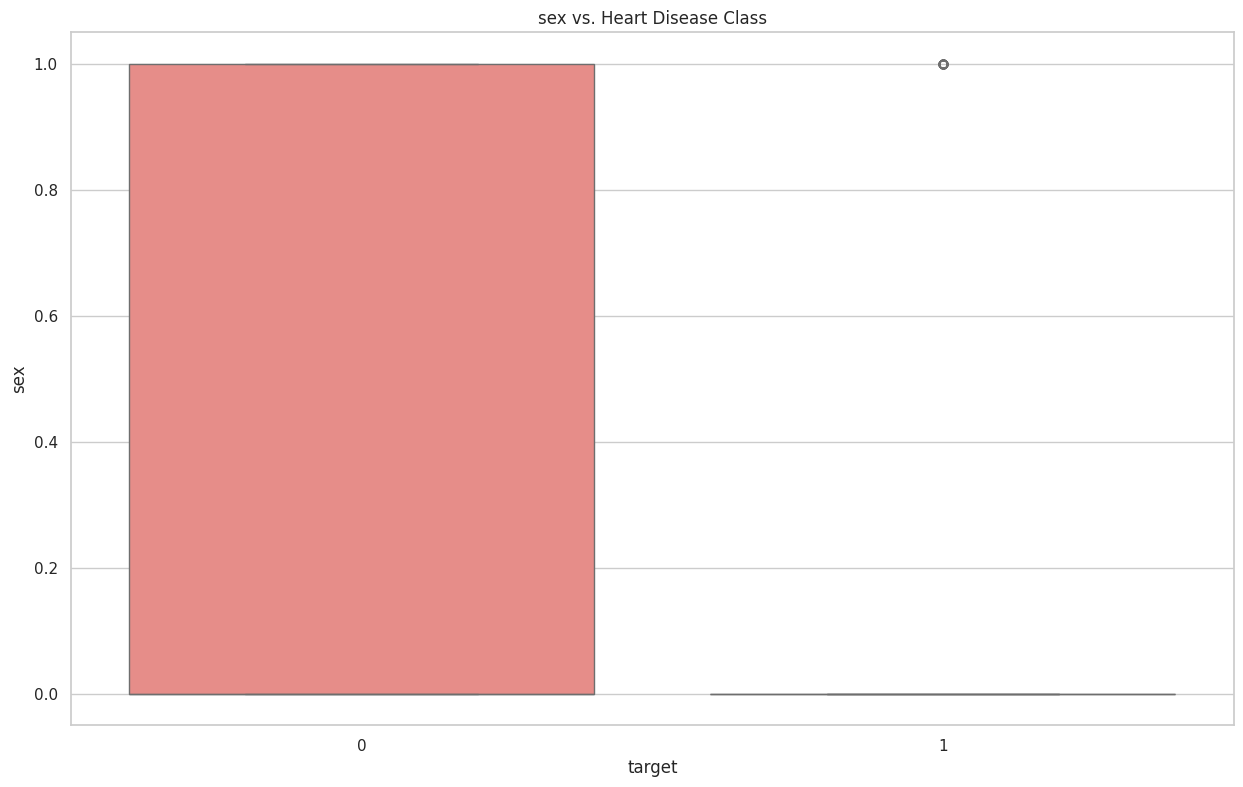

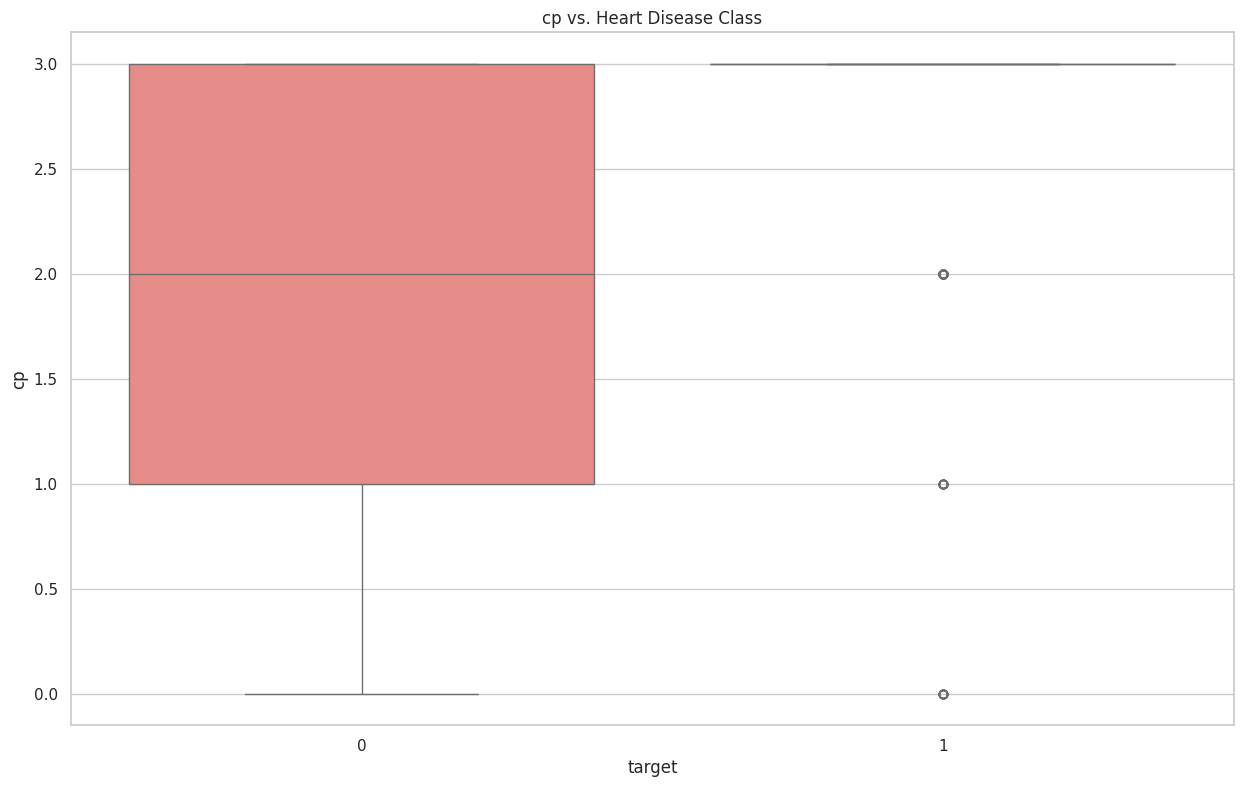

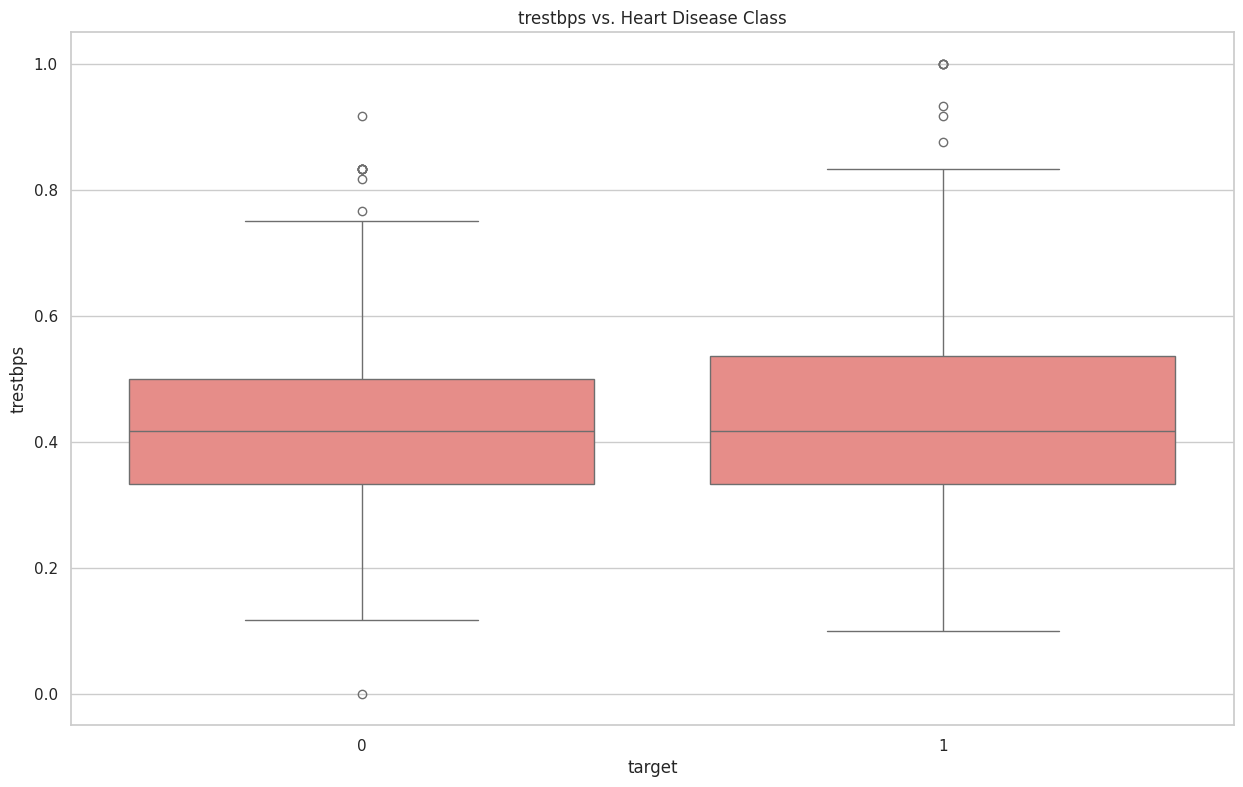

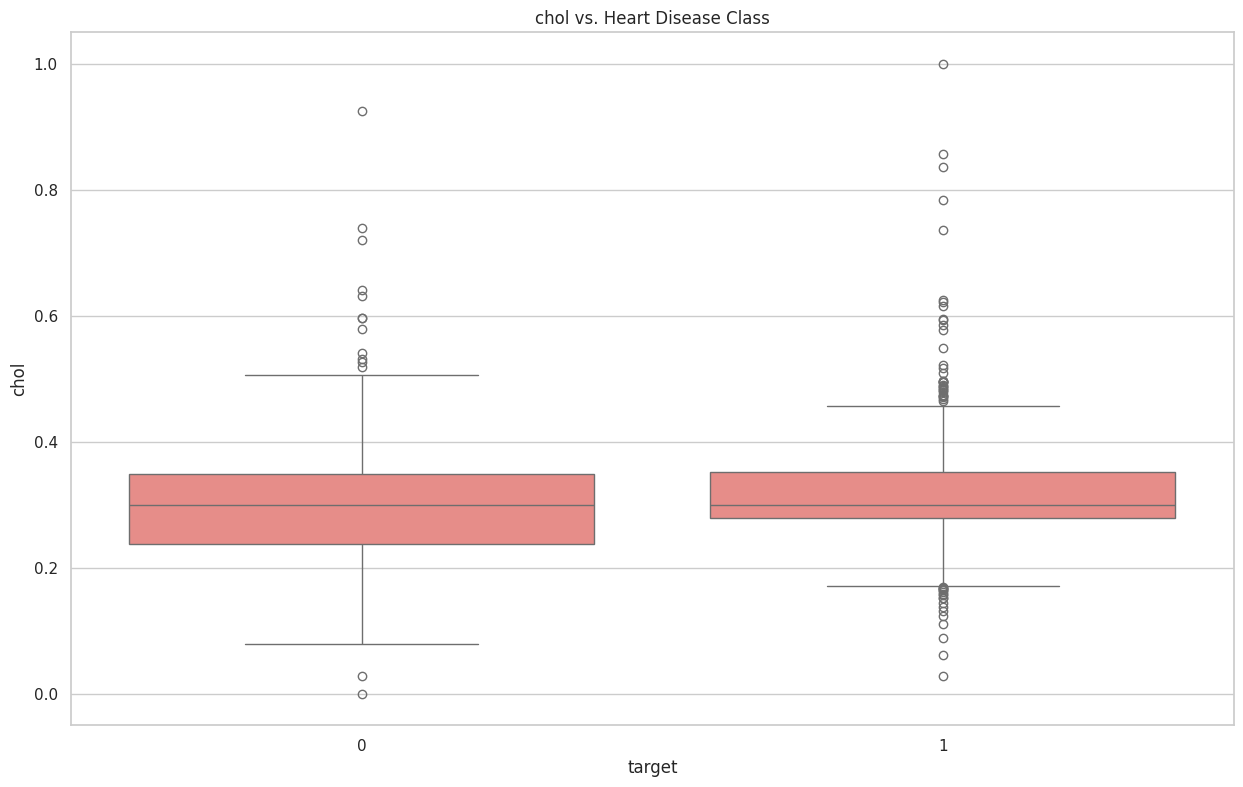

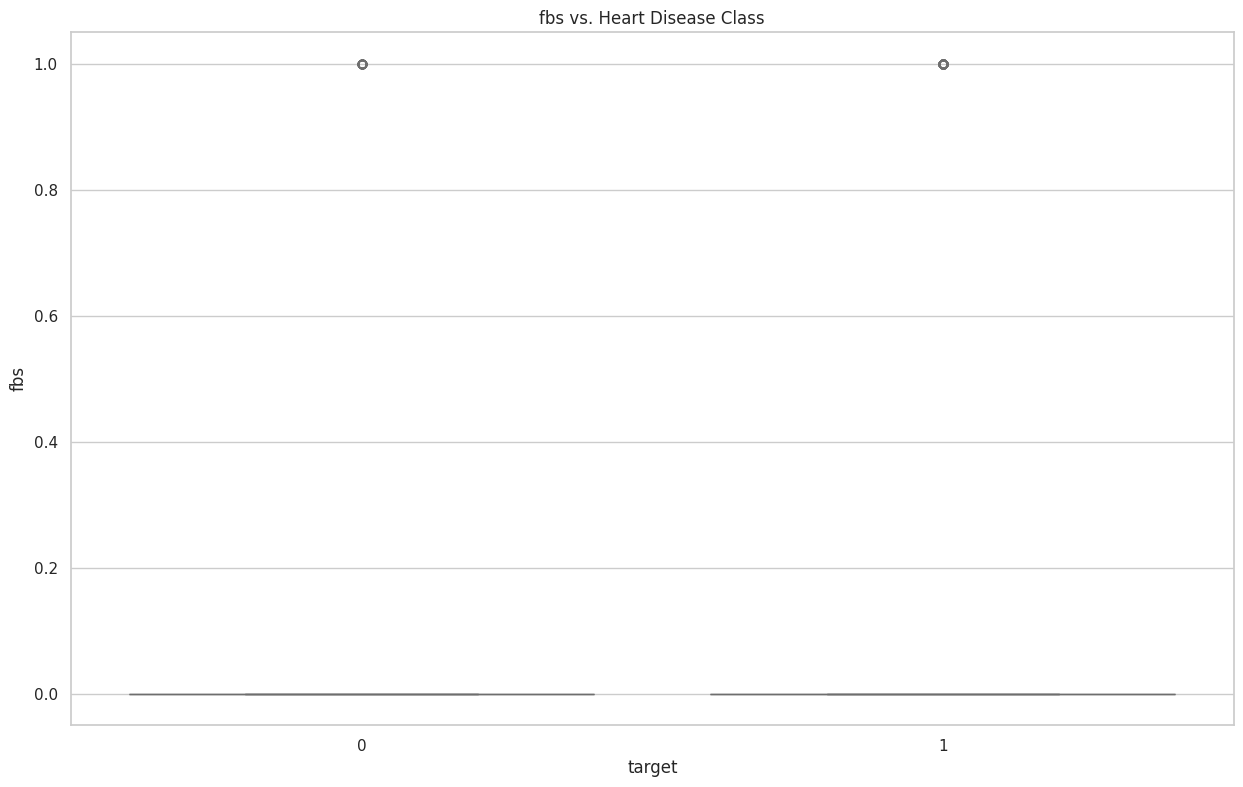

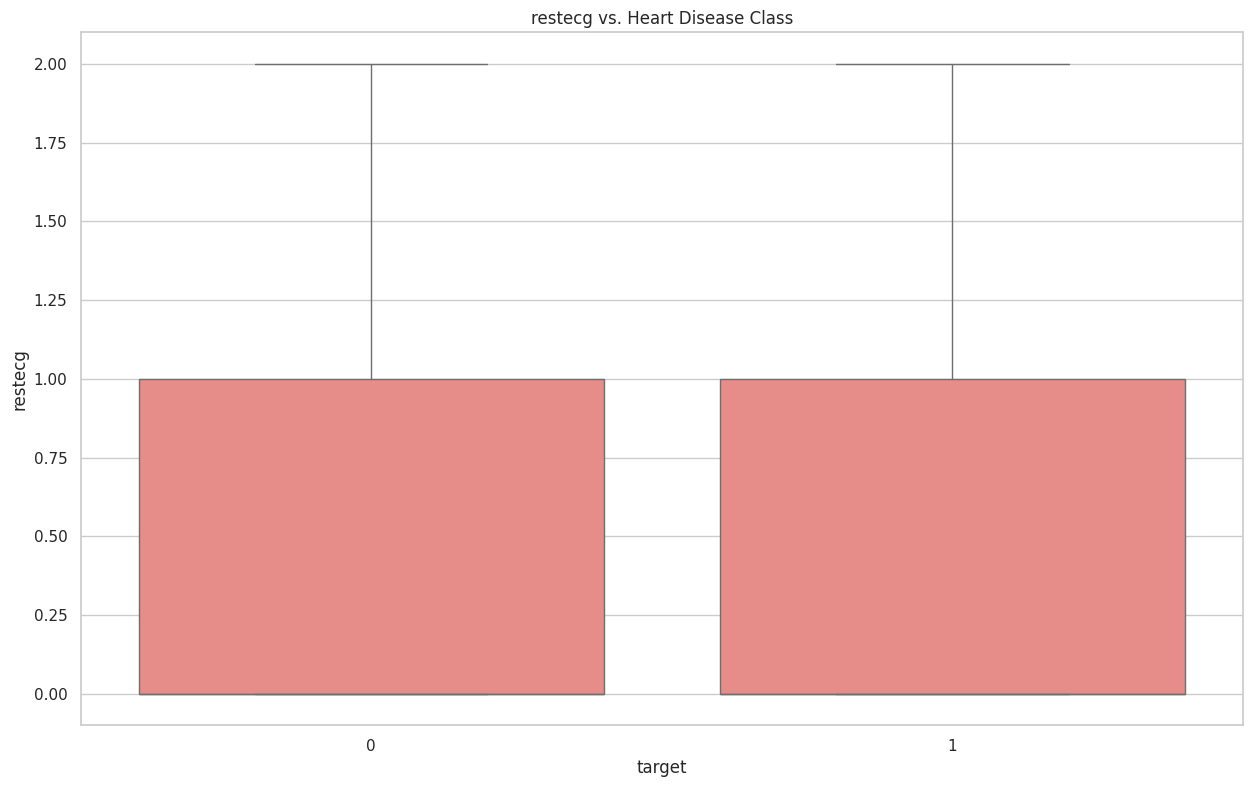

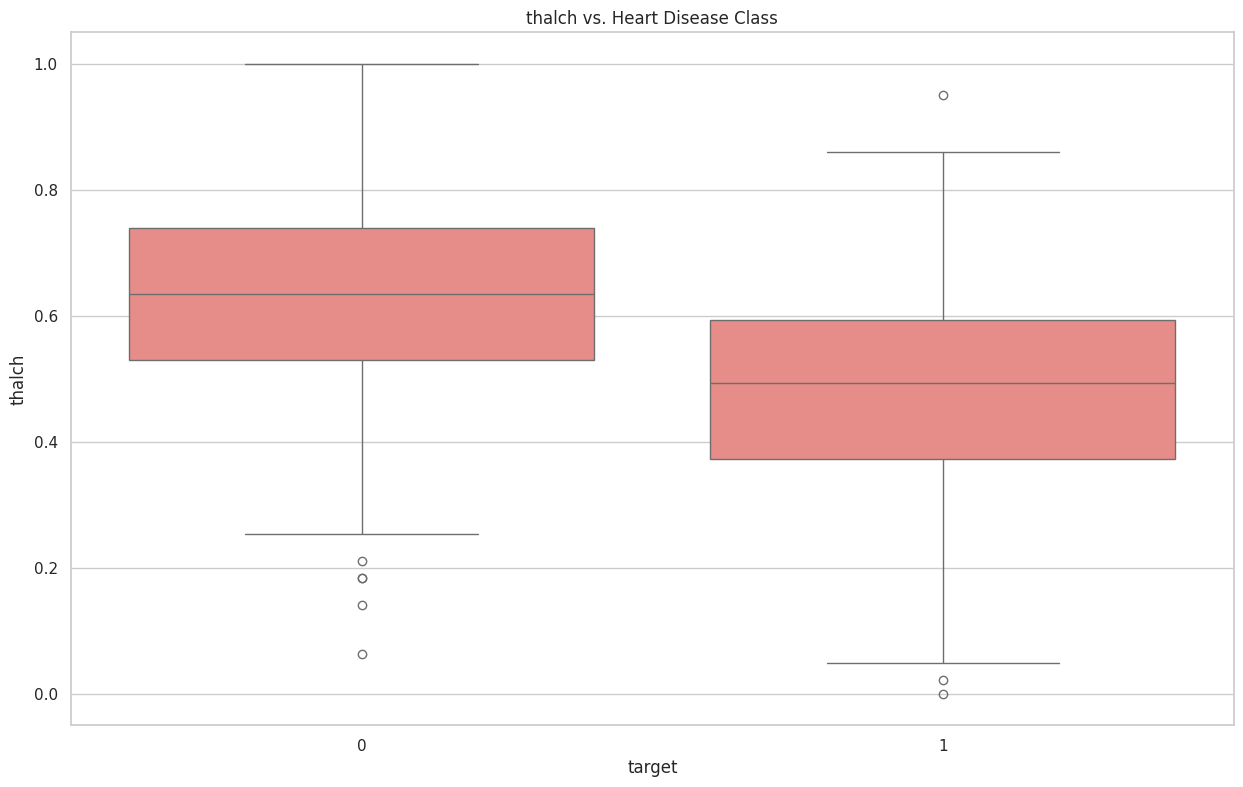

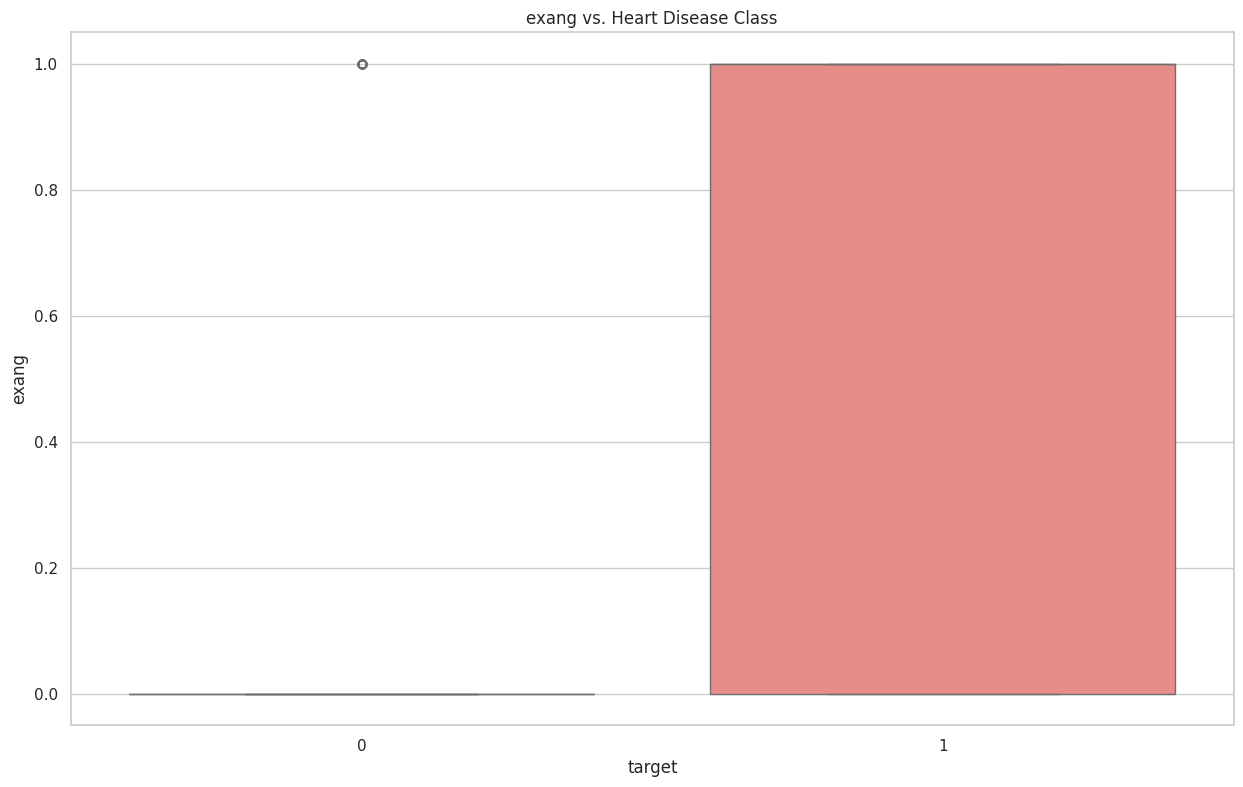

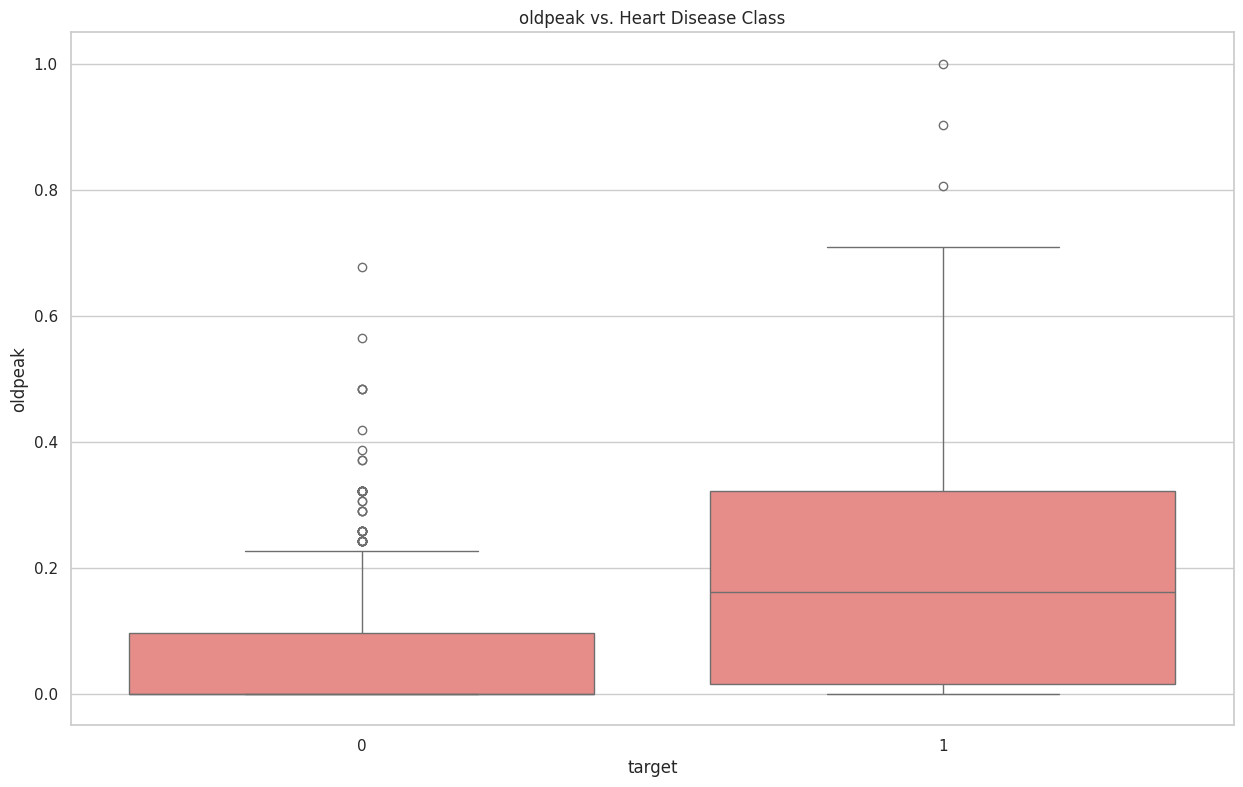

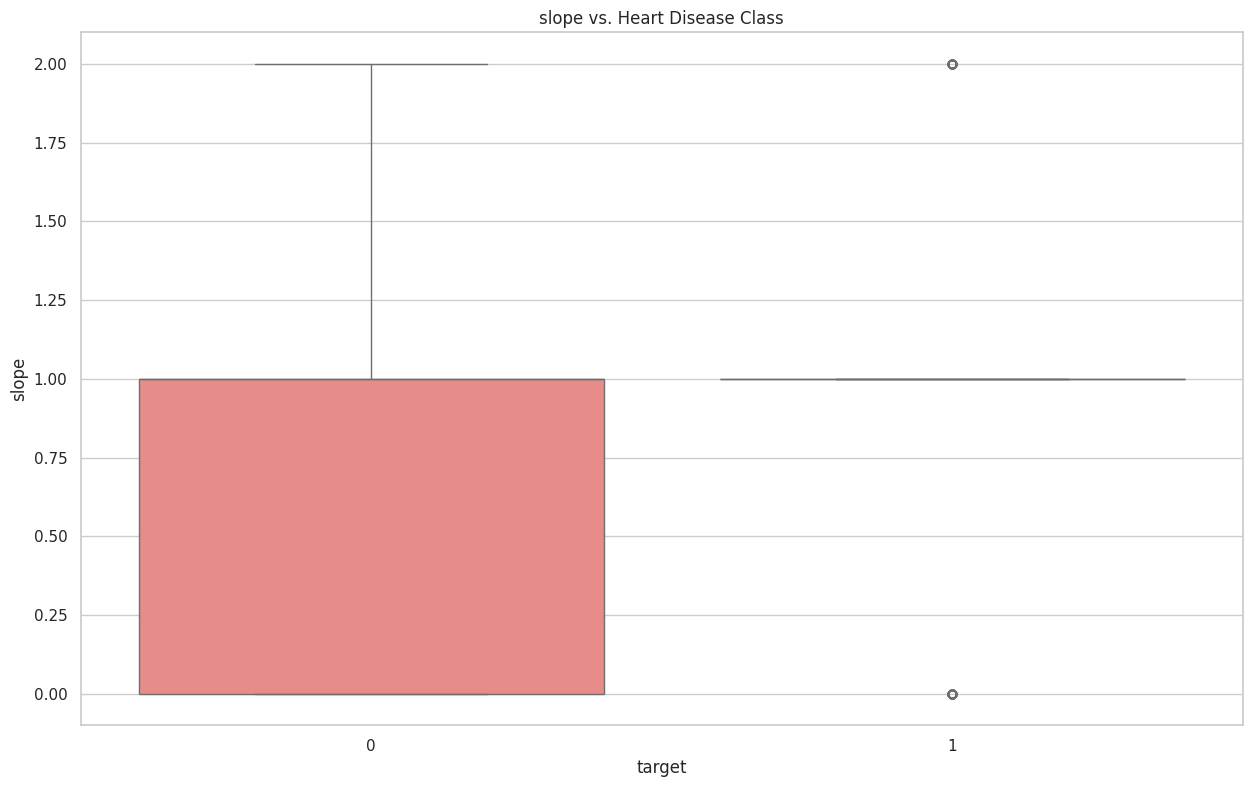

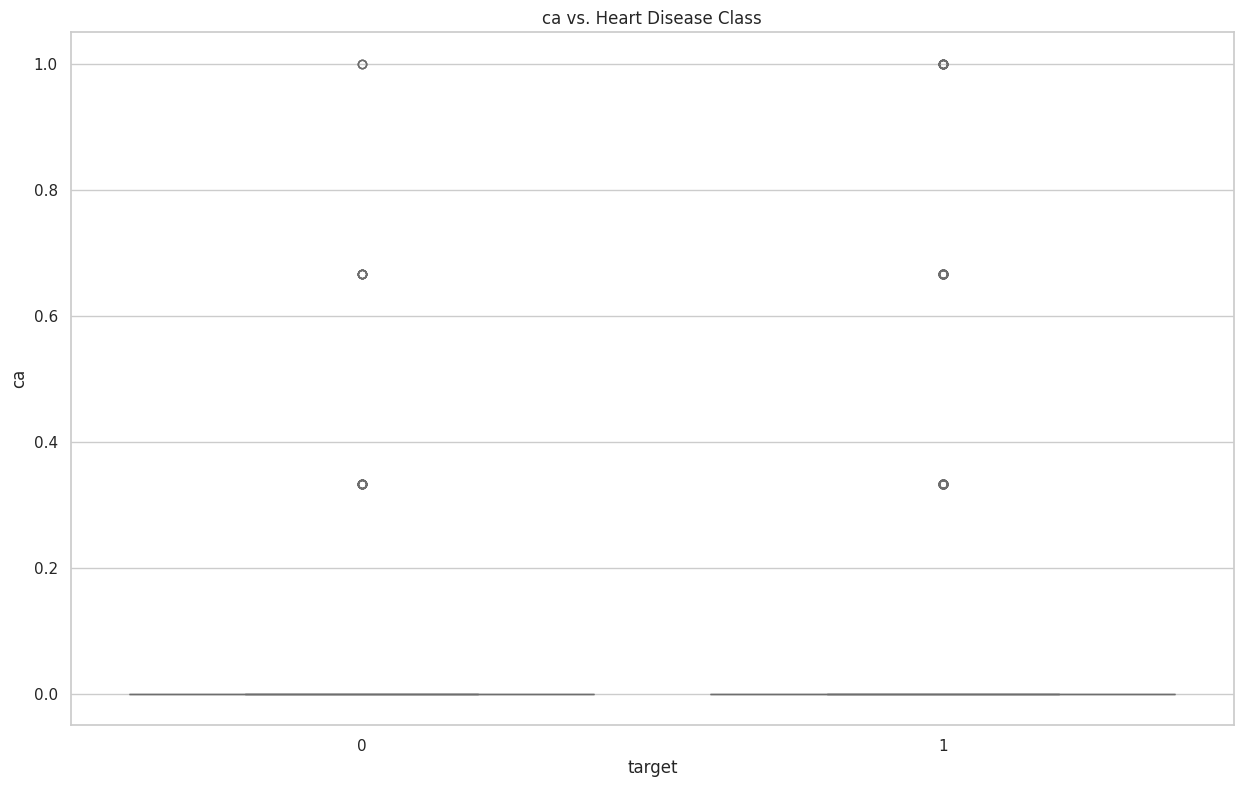

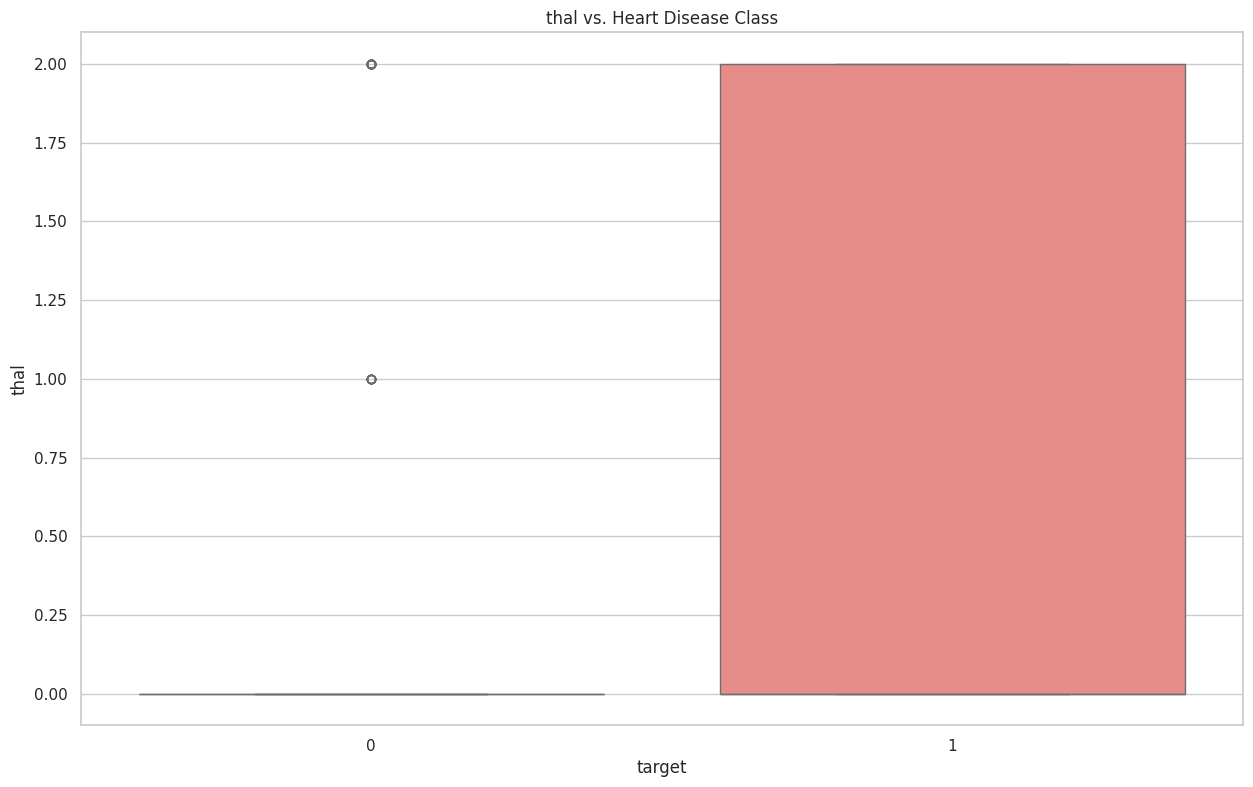

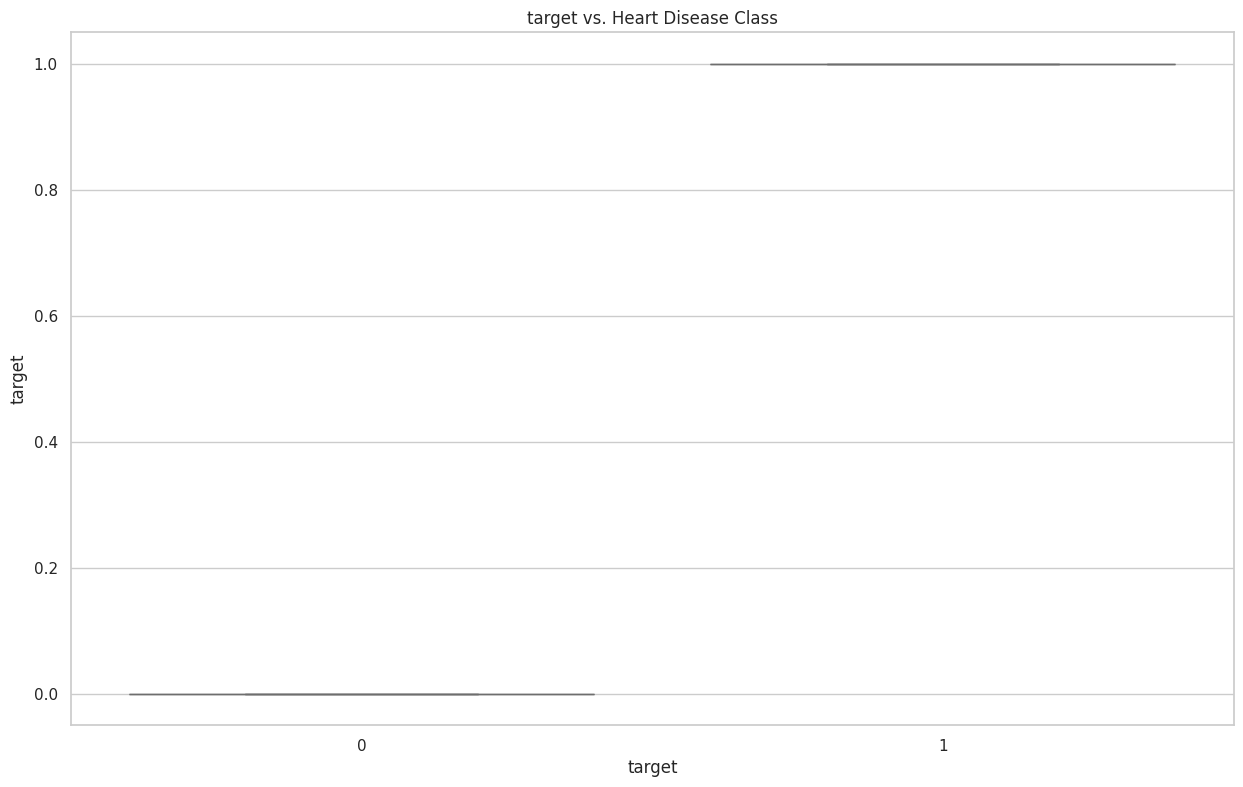

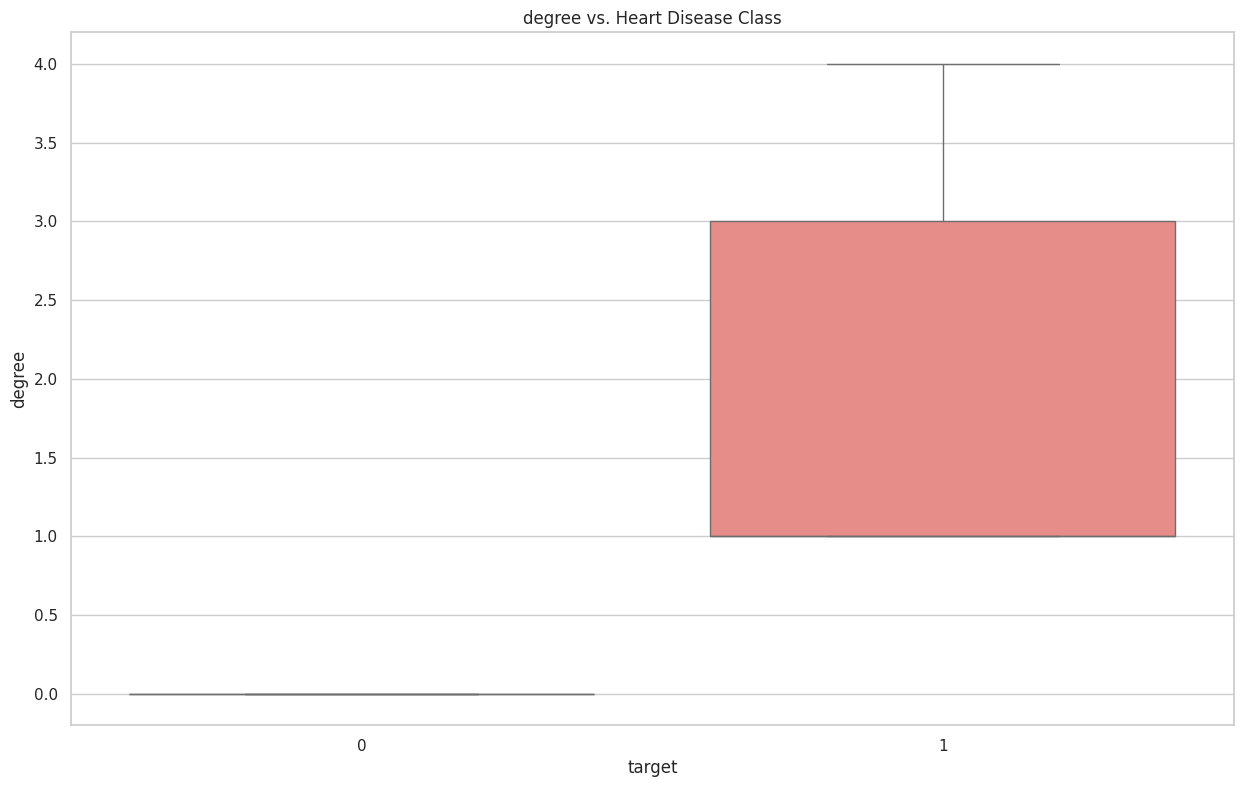

In [57]:
for feature in df.columns:
    plt.figure(figsize=(15, 9))
    sns.boxplot(x='target', y = feature, data = df , color = '#f67f79')
    plt.title(f"{feature} vs. Heart Disease Class")
    plt.show()

# 4. Countplot of Categorical Columns

In [58]:
print(categorical_columns)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    float64
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    int64  
 7   thalch    918 non-null    float64
 8   exang     918 non-null    int64  
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    int64  
 11  ca        918 non-null    float64
 12  thal      918 non-null    int64  
 13  target    918 non-null    int64  
 14  degree    918 non-null    int64  
dtypes: float64(6), int64(9)
memory usage: 114.8 KB


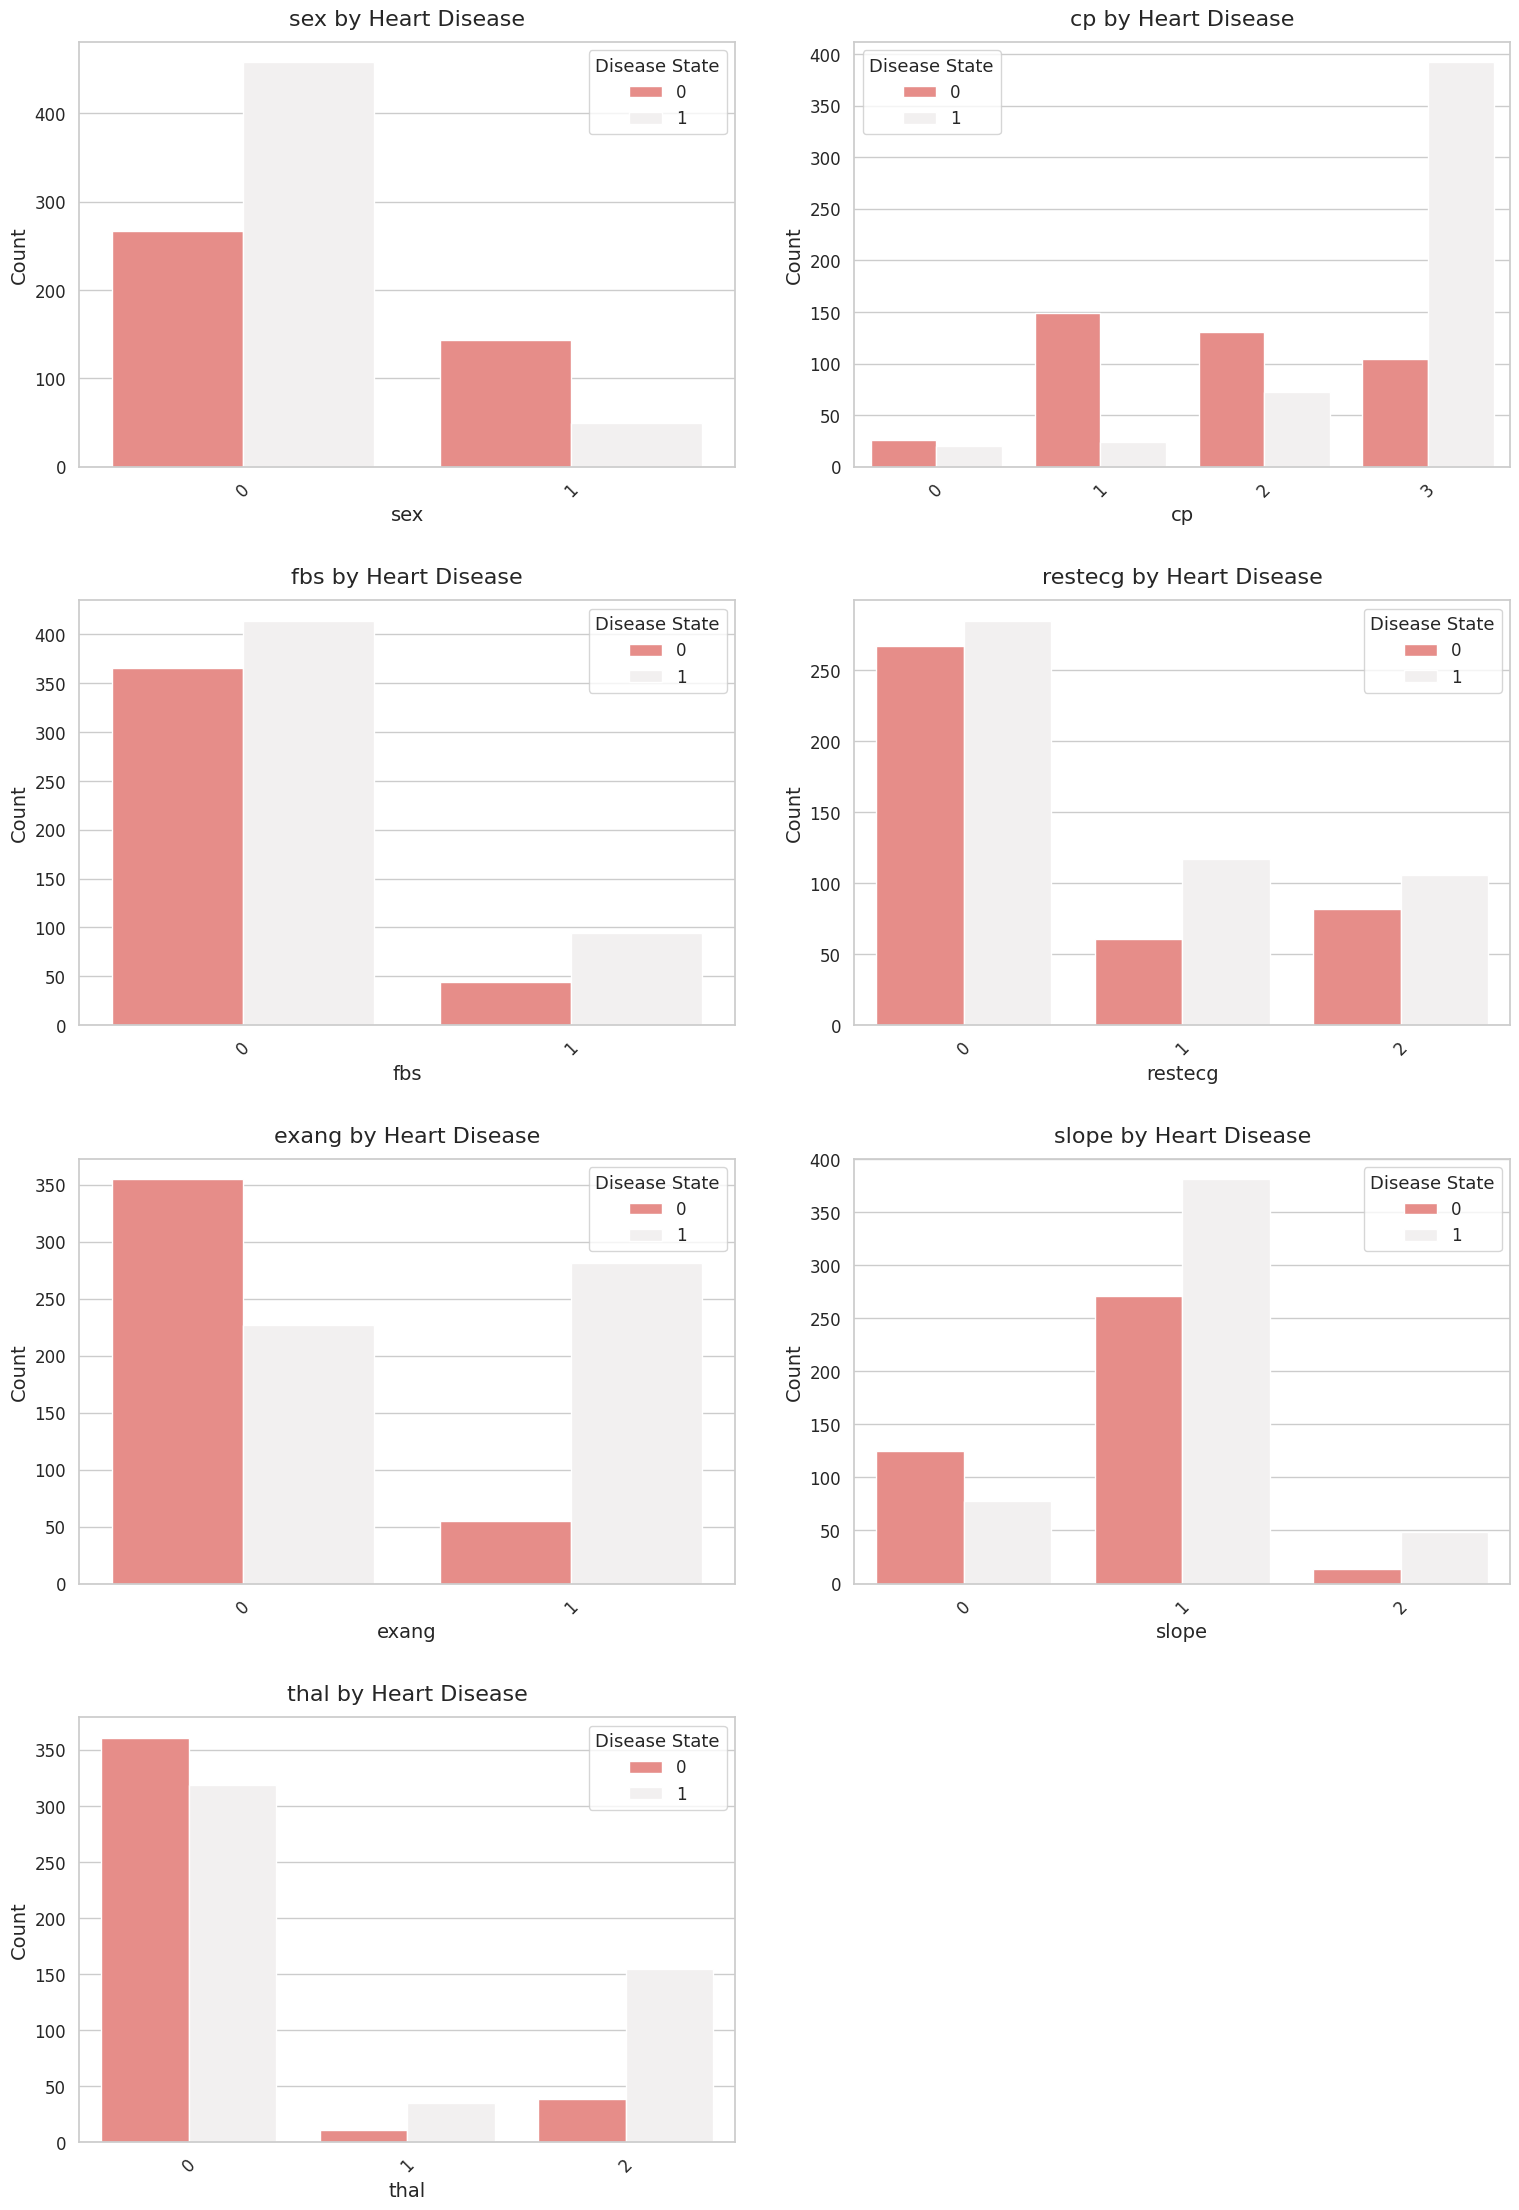

In [61]:
base_color = "#f67f79"
custom_palette = sns.light_palette(
    base_color,
    n_colors=df['target'].nunique(),
    input="hex",
    reverse=True
)

if not categorical_columns:
    print("No valid categorical columns found in df. Please check column names.")
else:
    num_cols = len(categorical_columns)
    cols_per_row = 2
    num_rows = math.ceil(num_cols / cols_per_row)

    fig, axes = plt.subplots(
        nrows=num_rows,
        ncols=cols_per_row,
        figsize=(cols_per_row * 8, num_rows * 6)
    )

    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(
            x=col,
            data=df,
            hue='target',
            palette=custom_palette,
            ax=axes[i]
        )
        axes[i].set_title(f"{col} by Heart Disease", fontsize=16, pad=12)
        axes[i].set_xlabel(col, fontsize=14)
        axes[i].set_ylabel('Count', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
        axes[i].legend(title='Disease State', fontsize=12, title_fontsize=13)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.92)
    plt.show()


In [62]:
df.to_csv('cleaned_data.csv', index=False)